# Economic Trend Analysis from 2000-2024

## Section 1: Importing Libraries and Loading Data


In [1]:
# Importing pandas for data manipulation
import pandas as pd



In [2]:
# Define file paths for each dataset
files = {
    "Federal_Funds_Effective_Rate": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Economic_Trend_Analysis\Resources\Federal Funds Effective Rate.csv",
    "GDP": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Economic_Trend_Analysis\Resources\GDP.csv",
    "Median_CPI": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Economic_Trend_Analysis\Resources\Median CPI.csv",
    "S&P500": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Economic_Trend_Analysis\Resources\sp500 yahoo.csv",
    "Unemployment_Rate": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Economic_Trend_Analysis\Resources\unemployment_rate.csv"
}

# Load each dataset into a dictionary of DataFrames for easy access
datasets = {name: pd.read_csv(path) for name, path in files.items()}


## Section 2: Inspecting Data



In [3]:
# Displaying first few rows of each dataset and column names to understand structure
for name, df in datasets.items():
    print(f"\nDataset: {name}\n")
    print(df.head(), "\n")
    print(df.info())
    print("Missing Values:\n", df.isnull().sum())



Dataset: Federal_Funds_Effective_Rate

         DATE   DFF
0  2000-01-01  3.99
1  2000-01-02  3.99
2  2000-01-03  5.43
3  2000-01-04  5.38
4  2000-01-05  5.41 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8767 entries, 0 to 8766
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    8767 non-null   object 
 1   DFF     8767 non-null   float64
dtypes: float64(1), object(1)
memory usage: 137.1+ KB
None
Missing Values:
 DATE    0
DFF     0
dtype: int64

Dataset: GDP

         DATE        GDP
0  2000-01-01  10002.179
1  2000-04-01  10247.720
2  2000-07-01  10318.165
3  2000-10-01  10435.744
4  2001-01-01  10470.231 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    97 non-null     object 
 1   GDP     97 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
M

In [4]:
# Define a dictionary of columns to rename for each dataset (if needed)
rename_columns = {
    "Federal_Funds_Effective_Rate": {"DFF": "Federal_Funds_Rate"},
    "GDP": {"GDP": "Gross_Domestic_Product"},
    "Median_CPI": {"MEDCPIM158SFRBCLE": "Median_CPI"},
    "S&P500": {"OPEN": "SP500_Open", "HIGH": "SP500_High", "LOW": "SP500_Low", "CLOSE": "SP500_Close", "ADJ CLOSE": "SP500_Adj_Close", "VOLUME": "SP500_Volume"},
    "Unemployment_Rate": {"UNRATE": "Unemployment_Rate"}
}

# Apply renaming to each DataFrame
for name, df in datasets.items():
    if name in rename_columns:
        df.rename(columns=rename_columns[name], inplace=True)


## Section 3: Cleaning Data


In [5]:
# Capitalize and strip whitespace from all column names in each dataset
for df in datasets.values():
    df.columns = df.columns.str.upper().str.strip()


In [6]:
# Standardize date formats
for name, df in datasets.items():
    if 'DATE' in df.columns:
        df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')  # Handle any invalid dates by setting them to NaT (Not a Time)



In [7]:
# Handle missing values by dropping or filling
for name, df in datasets.items():
    # Drop rows where date is missing (as it is crucial for time series analysis)
    df.dropna(subset=['DATE'], inplace=True)

    # Fill missing numeric data with interpolation where appropriate
    df.interpolate(method='linear', inplace=True)

    # Fill any remaining missing values with forward fill as a fallback
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)

    # Display remaining missing values after filling
    print(f"Remaining missing values in {name} after cleaning:\n", df.isnull().sum())


Remaining missing values in Federal_Funds_Effective_Rate after cleaning:
 DATE                  0
FEDERAL_FUNDS_RATE    0
dtype: int64
Remaining missing values in GDP after cleaning:
 DATE                      0
GROSS_DOMESTIC_PRODUCT    0
dtype: int64
Remaining missing values in Median_CPI after cleaning:
 DATE          0
MEDIAN_CPI    0
dtype: int64
Remaining missing values in S&P500 after cleaning:
 DATE         0
OPEN         0
HIGH         0
LOW          0
CLOSE        0
ADJ CLOSE    0
VOLUME       0
dtype: int64
Remaining missing values in Unemployment_Rate after cleaning:
 DATE                 0
UNEMPLOYMENT_RATE    0
dtype: int64


In [8]:

# Clean numeric columns by removing commas and ensuring they are floats
for name, df in datasets.items():
    for col in df.select_dtypes(include=['object']).columns:
        # Attempt to clean and convert strings with commas to numeric values
        df[col] = df[col].str.replace(',', '').astype(float, errors='ignore')


In [9]:
# Display final cleaned data
for name, df in datasets.items():
    print(f"\nFinal cleaned data for {name}:\n", df.head())
    print(df.info())



Final cleaned data for Federal_Funds_Effective_Rate:
         DATE  FEDERAL_FUNDS_RATE
0 2000-01-01                3.99
1 2000-01-02                3.99
2 2000-01-03                5.43
3 2000-01-04                5.38
4 2000-01-05                5.41
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8767 entries, 0 to 8766
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DATE                8767 non-null   datetime64[ns]
 1   FEDERAL_FUNDS_RATE  8767 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.1 KB
None

Final cleaned data for GDP:
         DATE  GROSS_DOMESTIC_PRODUCT
0 2000-01-01               10002.179
1 2000-04-01               10247.720
2 2000-07-01               10318.165
3 2000-10-01               10435.744
4 2001-01-01               10470.231
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns

In [10]:
# Define output path for saving cleaned files
output_folder = r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Economic_Trend_Analysis\Resources"

# Save each cleaned DataFrame to a CSV file
for name, df in datasets.items():
    cleaned_file_path = f"{output_folder}\\{name}_cleaned.csv"
    df.to_csv(cleaned_file_path, index=False)  # Save without the index column for a cleaner file
    print(f"Saved cleaned data for {name} to {cleaned_file_path}")


Saved cleaned data for Federal_Funds_Effective_Rate to C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Economic_Trend_Analysis\Resources\Federal_Funds_Effective_Rate_cleaned.csv
Saved cleaned data for GDP to C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Economic_Trend_Analysis\Resources\GDP_cleaned.csv
Saved cleaned data for Median_CPI to C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Economic_Trend_Analysis\Resources\Median_CPI_cleaned.csv
Saved cleaned data for S&P500 to C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Economic_Trend_Analysis\Resources\S&P500_cleaned.csv
Saved cleaned data for Unemployment_Rate to C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Economic_Trend_Analysis\Resources\Unemployment_Rate_cleaned.csv


## Section 4.1: Exploratory Data Analysis (EDA)


In [11]:
# Displaying summary statistics for each dataset
for name, df in datasets.items():
    print(f"\nSummary Statistics for {name}:\n")
    print(df.describe())



Summary Statistics for Federal_Funds_Effective_Rate:

                      DATE  FEDERAL_FUNDS_RATE
count                 8767         8767.000000
mean   2012-01-01 00:00:00            1.785671
min    2000-01-01 00:00:00            0.040000
25%    2005-12-31 12:00:00            0.130000
50%    2012-01-01 00:00:00            1.120000
75%    2017-12-31 12:00:00            2.720000
max    2024-01-01 00:00:00            7.030000
std                    NaN            1.950749

Summary Statistics for GDP:

                                DATE  GROSS_DOMESTIC_PRODUCT
count                             97               97.000000
mean   2011-12-31 14:21:01.855670016            16999.236742
min              2000-01-01 00:00:00            10002.179000
25%              2006-01-01 00:00:00            13599.160000
50%              2012-01-01 00:00:00            16068.805000
75%              2018-01-01 00:00:00            20037.088000
max              2024-01-01 00:00:00            28624.069000
std 

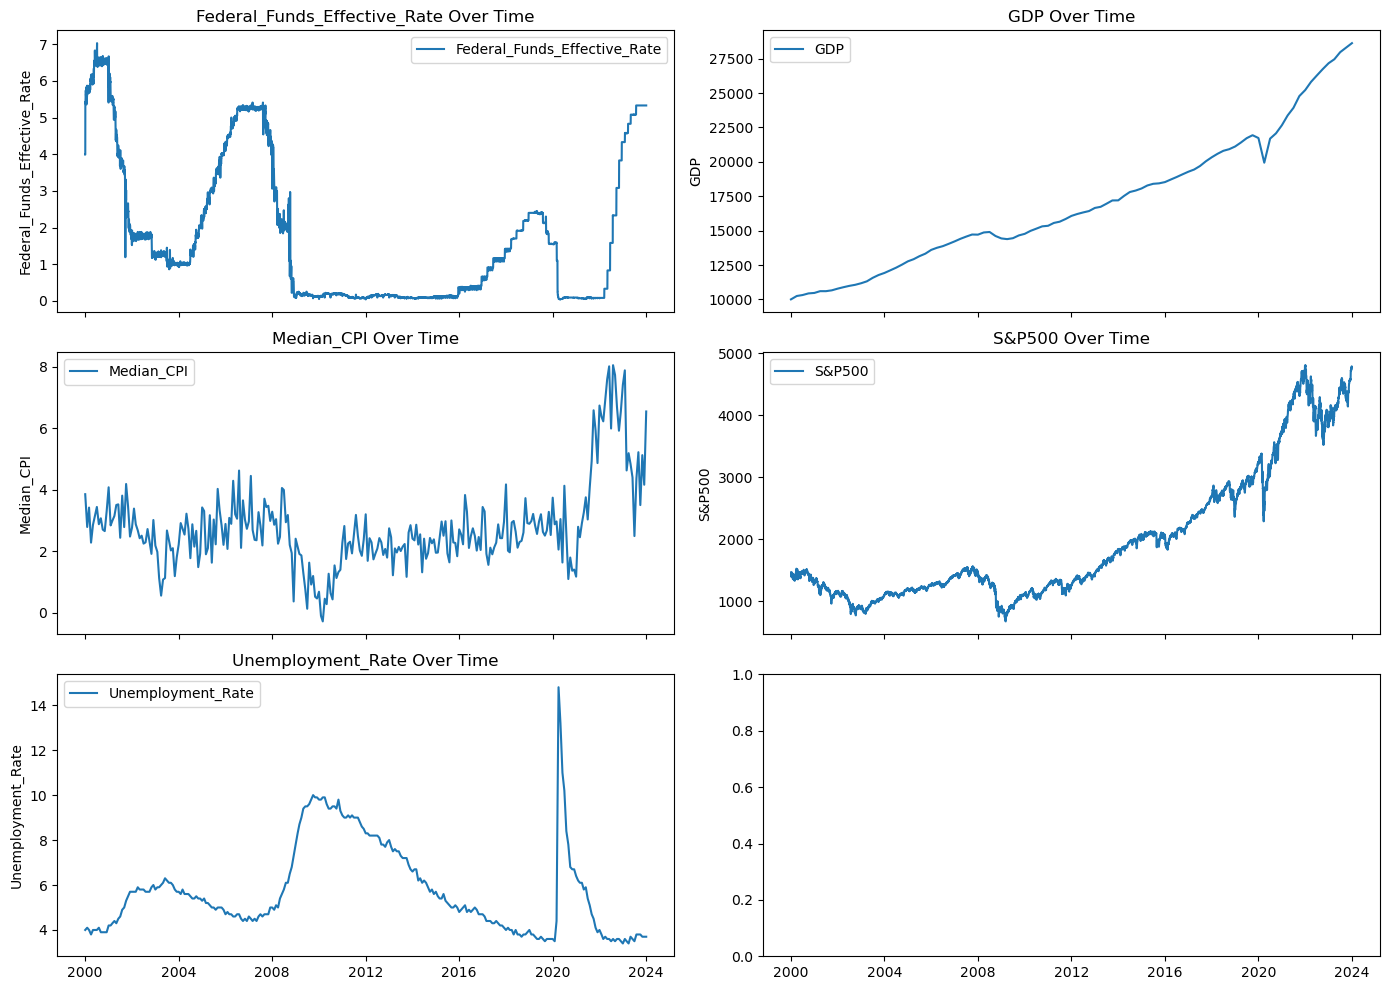

In [12]:
import matplotlib.pyplot as plt

# Line plots for each key indicator over time
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)

# Dictionary to match each dataset to a subplot axis
plot_mapping = {
    "Federal_Funds_Effective_Rate": axes[0, 0],
    "GDP": axes[0, 1],
    "Median_CPI": axes[1, 0],
    "S&P500": axes[1, 1],
    "Unemployment_Rate": axes[2, 0]
}

for name, ax in plot_mapping.items():
    df = datasets[name]
    if 'DATE' in df.columns:
        ax.plot(df['DATE'], df.iloc[:, 1], label=name)
        ax.set_title(f"{name} Over Time")
        ax.set_ylabel(name)
        ax.legend()

plt.tight_layout()
plt.show()


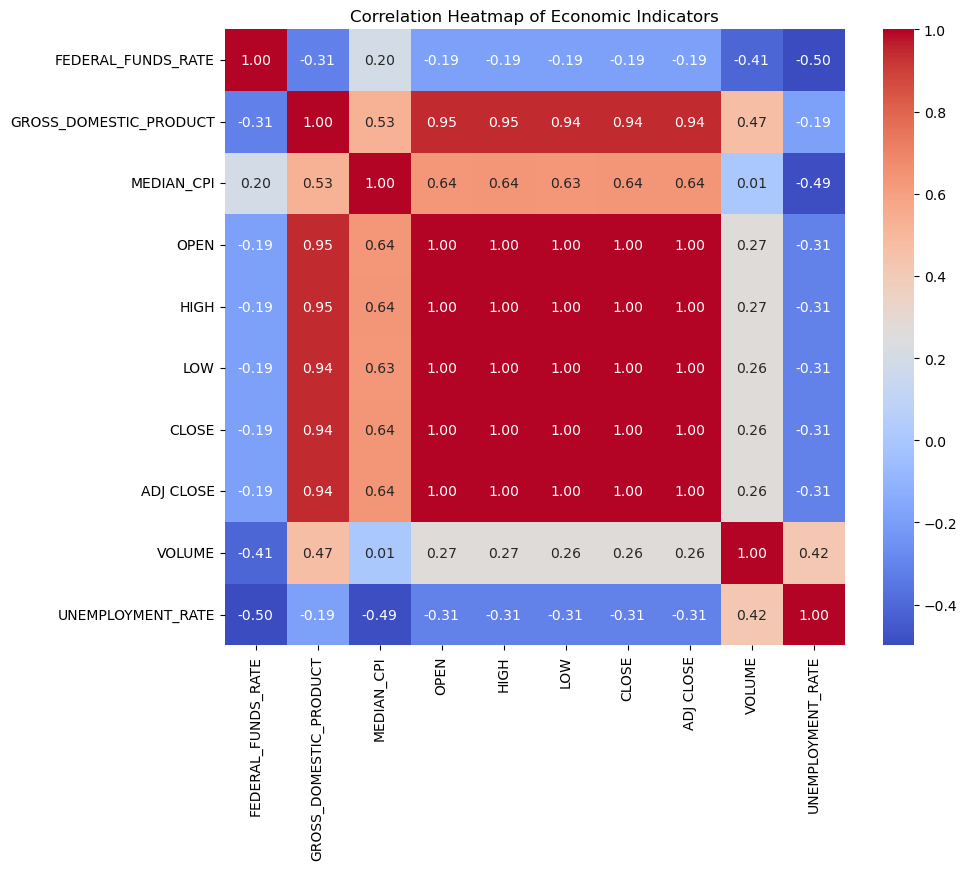

In [13]:
import seaborn as sns

# Merging datasets for correlation analysis
merged_df = pd.concat([df.set_index('DATE') for df in datasets.values()], axis=1).dropna()
correlation_matrix = merged_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Economic Indicators")
plt.show()


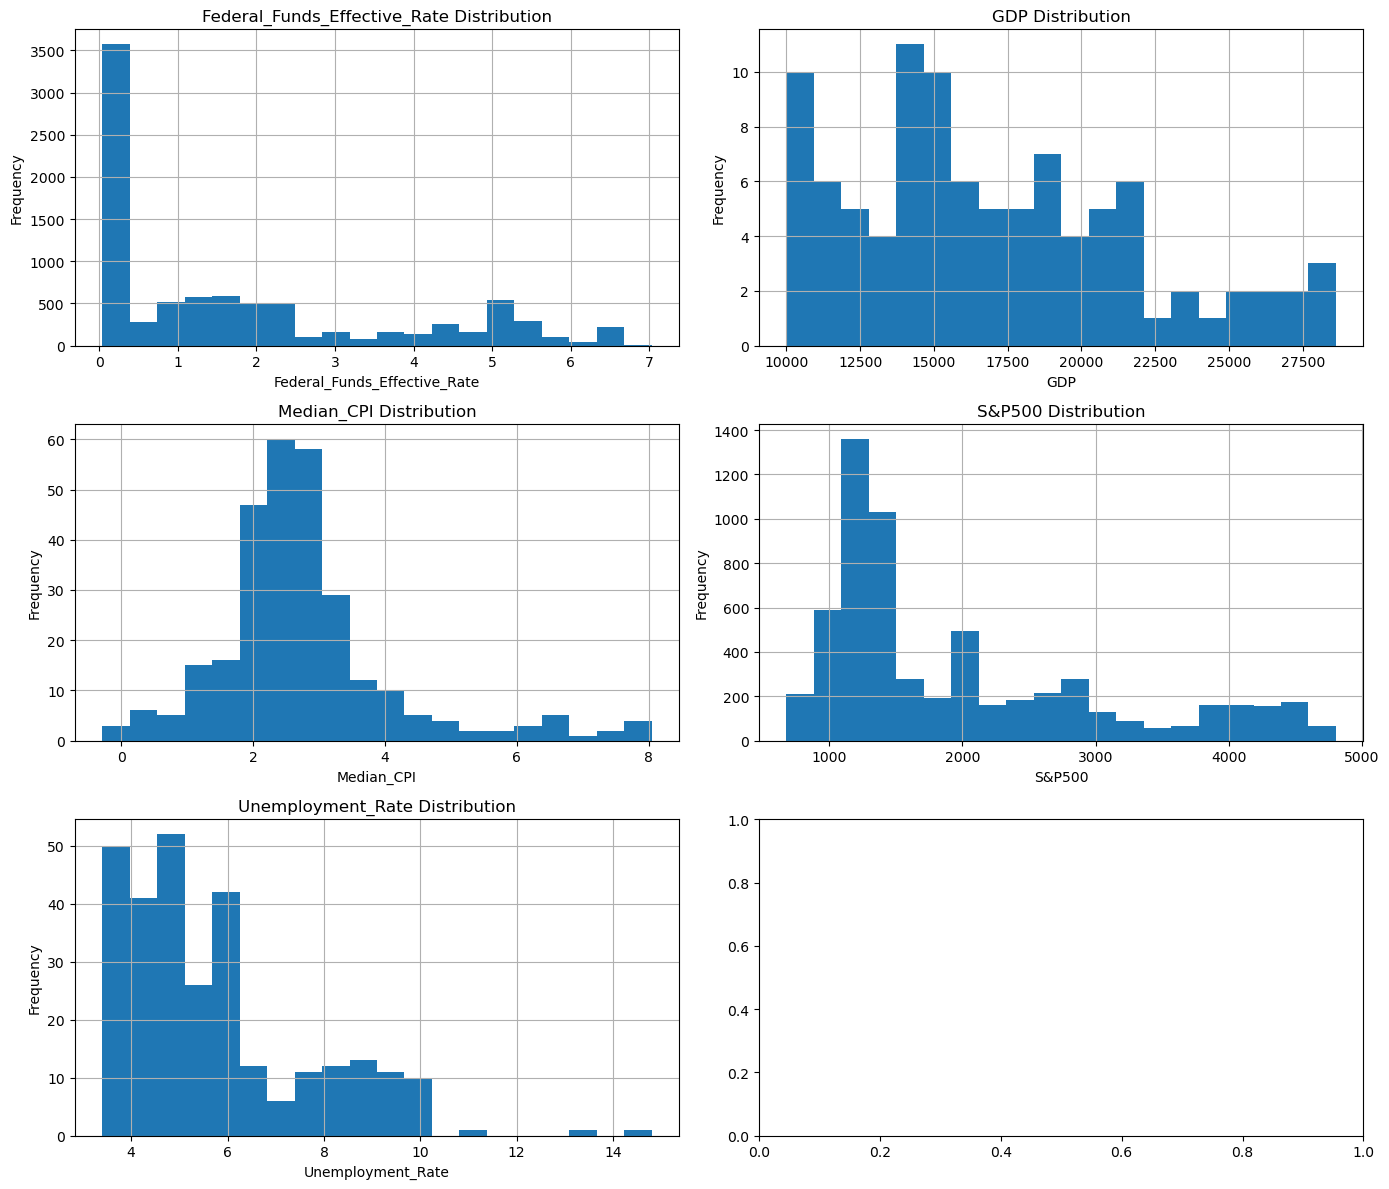

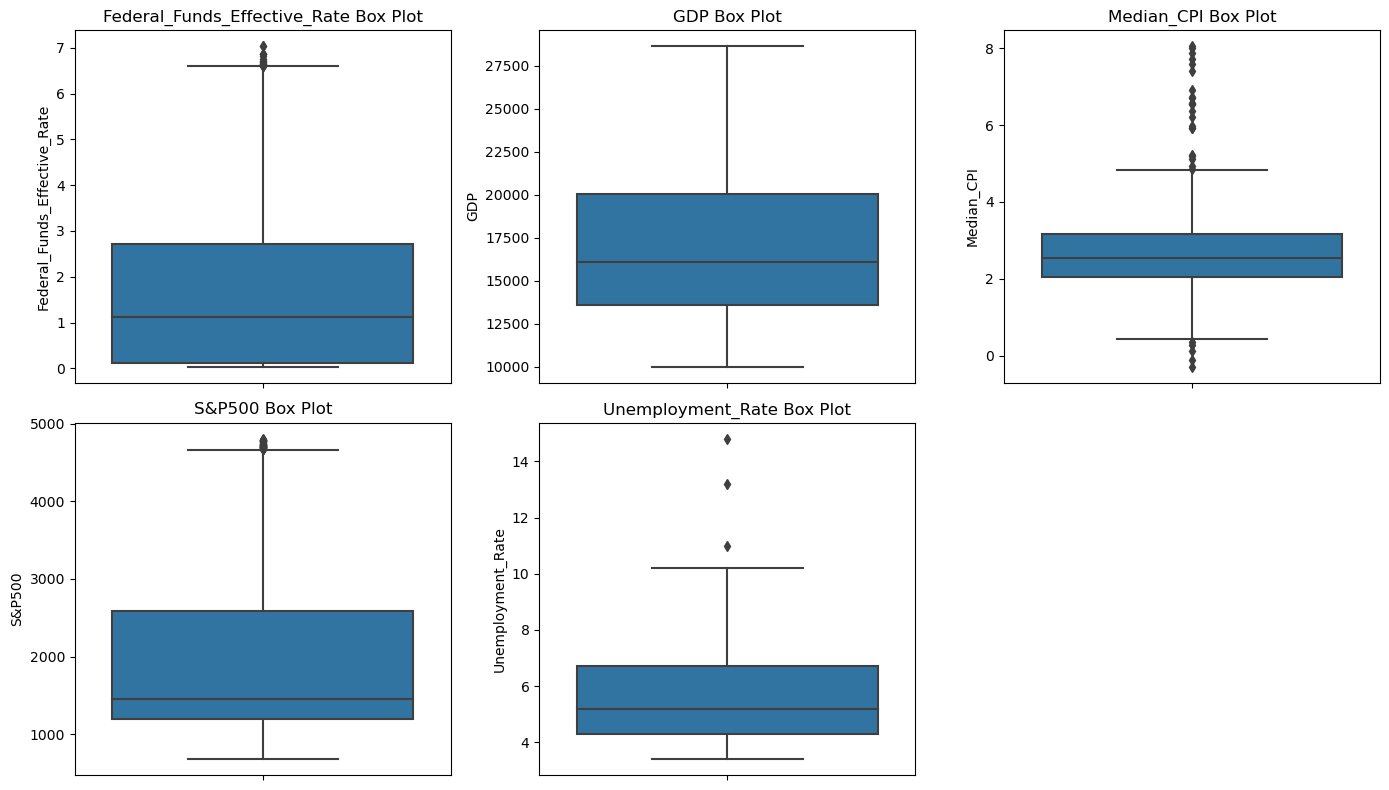

In [14]:
# Histograms
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

for i, (name, df) in enumerate(datasets.items()):
    ax = axes.flatten()[i]
    df.iloc[:, 1].hist(bins=20, ax=ax)
    ax.set_title(f"{name} Distribution")
    ax.set_xlabel(name)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Box Plots
plt.figure(figsize=(14, 8))
for i, (name, df) in enumerate(datasets.items()):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df.iloc[:, 1])
    plt.title(f"{name} Box Plot")
    plt.ylabel(name)

plt.tight_layout()
plt.show()


## Section 4.2: Merging Files Using SQL


In [15]:
import sqlite3
import pandas as pd

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Load each cleaned DataFrame from 'datasets' into SQLite with SQL-compatible table names
for name, df in datasets.items():
    # Clean table names for SQL (remove special characters)
    table_name = name.replace("&", "").replace(" ", "_").replace("-", "").upper()
    
    # Clean column names to be SQL-compatible
    df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True).str.upper().str.strip()
    
    # Save DataFrame to SQLite table
    df.to_sql(table_name, conn, if_exists='replace', index=False)
    print(f"Table '{table_name}' loaded into SQLite.")


Table 'FEDERAL_FUNDS_EFFECTIVE_RATE' loaded into SQLite.
Table 'GDP' loaded into SQLite.
Table 'MEDIAN_CPI' loaded into SQLite.
Table 'SP500' loaded into SQLite.
Table 'UNEMPLOYMENT_RATE' loaded into SQLite.


In [16]:
# Function to print the structure of each table in SQLite for verification
def print_table_info(conn):
    table_names = ['FEDERAL_FUNDS_EFFECTIVE_RATE', 'GDP', 'MEDIAN_CPI', 'SP500', 'UNEMPLOYMENT_RATE']
    for table_name in table_names:
        print(f"\nStructure of table '{table_name}':")
        result = pd.read_sql_query(f"PRAGMA table_info({table_name});", conn)
        print(result)

# Call function to display table structure
print_table_info(conn)



Structure of table 'FEDERAL_FUNDS_EFFECTIVE_RATE':
   cid                name       type  notnull dflt_value  pk
0    0                DATE  TIMESTAMP        0       None   0
1    1  FEDERAL_FUNDS_RATE       REAL        0       None   0

Structure of table 'GDP':
   cid                    name       type  notnull dflt_value  pk
0    0                    DATE  TIMESTAMP        0       None   0
1    1  GROSS_DOMESTIC_PRODUCT       REAL        0       None   0

Structure of table 'MEDIAN_CPI':
   cid        name       type  notnull dflt_value  pk
0    0        DATE  TIMESTAMP        0       None   0
1    1  MEDIAN_CPI       REAL        0       None   0

Structure of table 'SP500':
   cid      name       type  notnull dflt_value  pk
0    0      DATE  TIMESTAMP        0       None   0
1    1      OPEN       REAL        0       None   0
2    2      HIGH       REAL        0       None   0
3    3       LOW       REAL        0       None   0
4    4     CLOSE       REAL        0       None   0


In [17]:
# SQL query to join tables on 'DATE' and select key columns for analysis
query = '''
    SELECT 
        a.DATE,
        a.FEDERAL_FUNDS_RATE AS FEDERAL_FUNDS_RATE,
        b.GROSS_DOMESTIC_PRODUCT AS GDP,
        c.MEDIAN_CPI AS MEDIAN_CPI,
        d.CLOSE AS SP500_CLOSE,
        e.UNEMPLOYMENT_RATE AS UNEMPLOYMENT_RATE
    FROM 
        FEDERAL_FUNDS_EFFECTIVE_RATE a
    JOIN 
        GDP b ON a.DATE = b.DATE
    JOIN 
        MEDIAN_CPI c ON a.DATE = c.DATE
    JOIN 
        SP500 d ON a.DATE = d.DATE
    JOIN 
        UNEMPLOYMENT_RATE e ON a.DATE = e.DATE
'''

# Execute the query and load the consolidated data into a DataFrame
consolidated_df = pd.read_sql_query(query, conn)

# Display the first few rows of the consolidated DataFrame
print("Consolidated Data:")
print(consolidated_df.head())


Consolidated Data:
                  DATE  FEDERAL_FUNDS_RATE        GDP  MEDIAN_CPI  \
0  2001-10-01 00:00:00                3.02  10660.465    4.184077   
1  2002-04-01 00:00:00                1.88  10887.460    2.676482   
2  2002-07-01 00:00:00                1.83  10984.040    2.245055   
3  2002-10-01 00:00:00                1.85  11061.433    2.313903   
4  2003-04-01 00:00:00                1.29  11312.766    0.553037   

   SP500_CLOSE  UNEMPLOYMENT_RATE  
0      1038.55                5.3  
1      1146.54                5.9  
2       968.65                5.8  
3       847.91                5.7  
4       858.48                6.0  


## Section 4.3: Creating a Database in SQLite and Storing Cleaned Data

In [26]:
from sqlalchemy import create_engine

# Connect to an SQLite database (it will create the file if it doesn't exist)
engine = create_engine("sqlite:///Economic_Trend_Analysis.db")

# SQLite uses a single file for the database; the file will be named 'Economic_Trend_Analysis.db'


In [27]:
# Creating database tables in SQLite
for name, df in datasets.items():
    # Ensure table names are cleaned and SQL-compatible
    table_name = name.replace("&", "").replace(" ", "_").replace("-", "").upper()

    # Save the DataFrame to SQLite
    df.to_sql(table_name, con=engine, if_exists='replace', index=False)
    print(f"Table {table_name} created and loaded into SQLite database.")


  

Table FEDERAL_FUNDS_EFFECTIVE_RATE created and loaded into SQLite database.
Table GDP created and loaded into SQLite database.
Table MEDIAN_CPI created and loaded into SQLite database.
Table SP500 created and loaded into SQLite database.
Table UNEMPLOYMENT_RATE created and loaded into SQLite database.


In [28]:
import pandas as pd

# Example query: Read all rows from a specific table
query = "SELECT * FROM GDP"
result_df = pd.read_sql_query(query, engine)

# Display the results
print(result_df.head())


                         DATE  GROSS_DOMESTIC_PRODUCT
0  2000-01-01 00:00:00.000000               10002.179
1  2000-04-01 00:00:00.000000               10247.720
2  2000-07-01 00:00:00.000000               10318.165
3  2000-10-01 00:00:00.000000               10435.744
4  2001-01-01 00:00:00.000000               10470.231


In [ ]:
# Query average unemployment rate by year
avg_unemployment_query = '''
    SELECT YEAR(DATE) AS Year, AVG(Unemployment_Rate) AS Avg_Unemployment_Rate
    FROM Unemployment_Rate
    GROUP BY YEAR(DATE)
    ORDER BY Year
'''

# Execute the query and load results into a DataFrame
avg_unemployment_df = pd.read_sql_query(avg_unemployment_query, engine)
print("Average Unemployment Rate by Year:")
print(avg_unemployment_df.head())

# Query top 10 months of highest S&P500 values
top_sp500_query = '''
    SELECT DATE, SP500_CLOSE
    FROM S&P500
    ORDER BY SP500_CLOSE DESC
    LIMIT 10
'''

top_sp500_df = pd.read_sql_query(top_sp500_query, engine)
print("Top 10 Months by S&P500 Close Value:")
print(top_sp500_df)


In [29]:
import sqlite3

# Connect to your SQLite database
conn = sqlite3.connect("Economic_Trend_Analysis.db")

# Test the connection by listing all tables
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
print("Tables in the database:", tables)


Tables in the database:                            name
0  FEDERAL_FUNDS_EFFECTIVE_RATE
1                           GDP
2                    MEDIAN_CPI
3                         SP500
4             UNEMPLOYMENT_RATE


In [30]:
# Example query: Get average GDP and Unemployment Rate
query = """
    SELECT AVG(GROSS_DOMESTIC_PRODUCT) AS Avg_GDP,
           AVG(UNEMPLOYMENT_RATE) AS Avg_Unemployment
    FROM GDP
    JOIN UNEMPLOYMENT_RATE ON GDP.DATE = UNEMPLOYMENT_RATE.DATE;
"""
result = pd.read_sql_query(query, conn)
print(result)


        Avg_GDP  Avg_Unemployment
0  16999.236742          5.783505


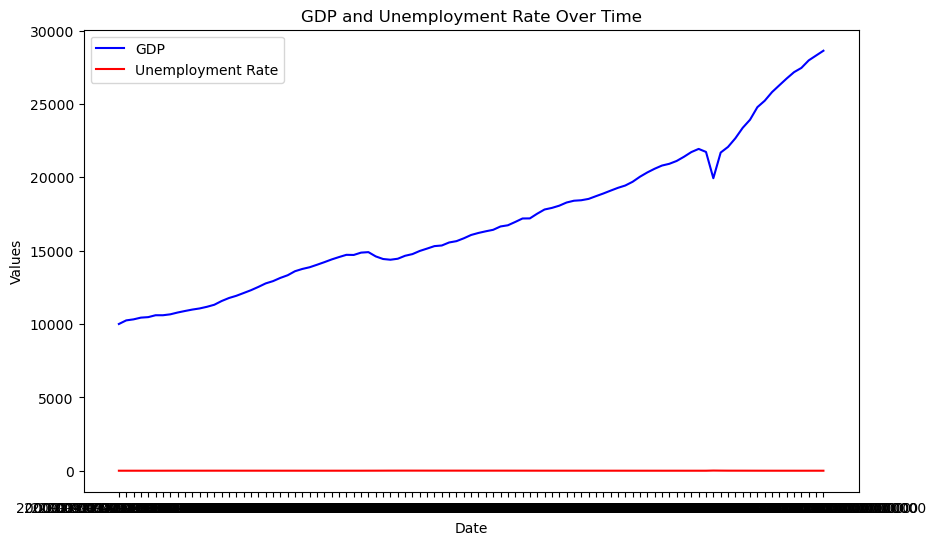

In [31]:
import matplotlib.pyplot as plt

# Query data for visualization
query = """
    SELECT GDP.DATE, GDP.GROSS_DOMESTIC_PRODUCT, UNEMPLOYMENT_RATE.UNEMPLOYMENT_RATE
    FROM GDP
    JOIN UNEMPLOYMENT_RATE ON GDP.DATE = UNEMPLOYMENT_RATE.DATE;
"""
data = pd.read_sql_query(query, conn)

# Plotting trends
plt.figure(figsize=(10, 6))
plt.plot(data['DATE'], data['GROSS_DOMESTIC_PRODUCT'], label='GDP', color='blue')
plt.plot(data['DATE'], data['UNEMPLOYMENT_RATE'], label='Unemployment Rate', color='red')
plt.title("GDP and Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.show()


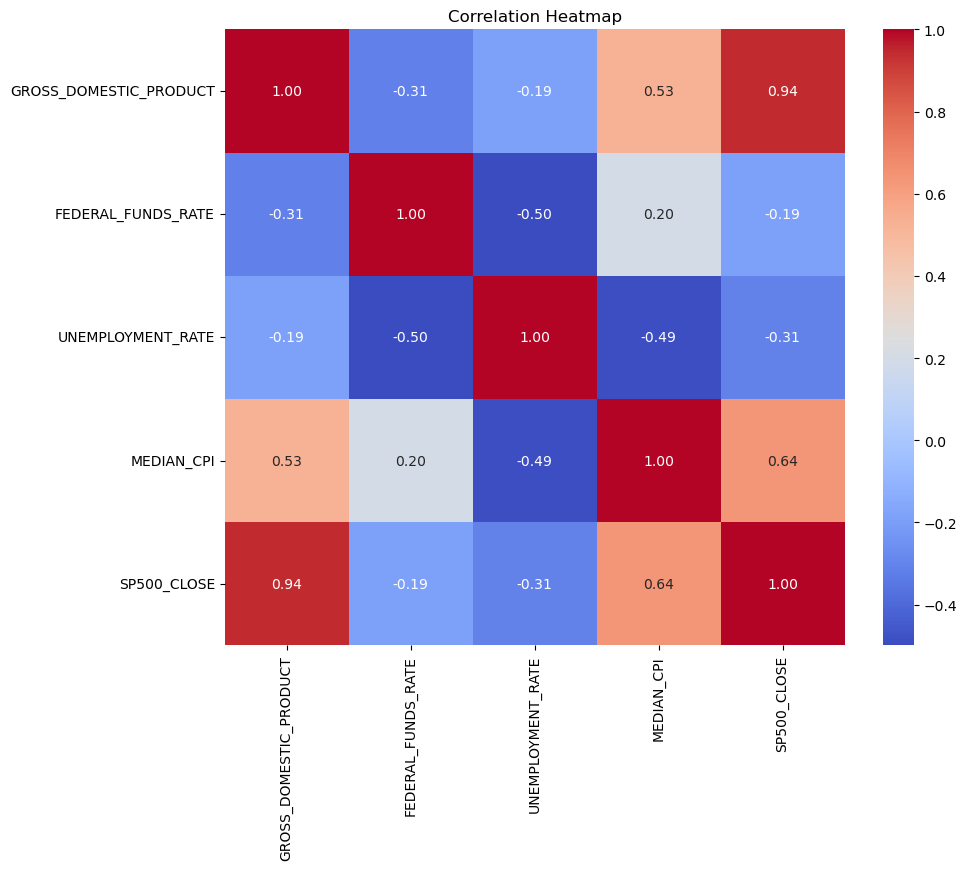

In [33]:
# Drop the 'DATE' column from the DataFrame for correlation calculation
numeric_data = merged_data.drop(columns=['DATE'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


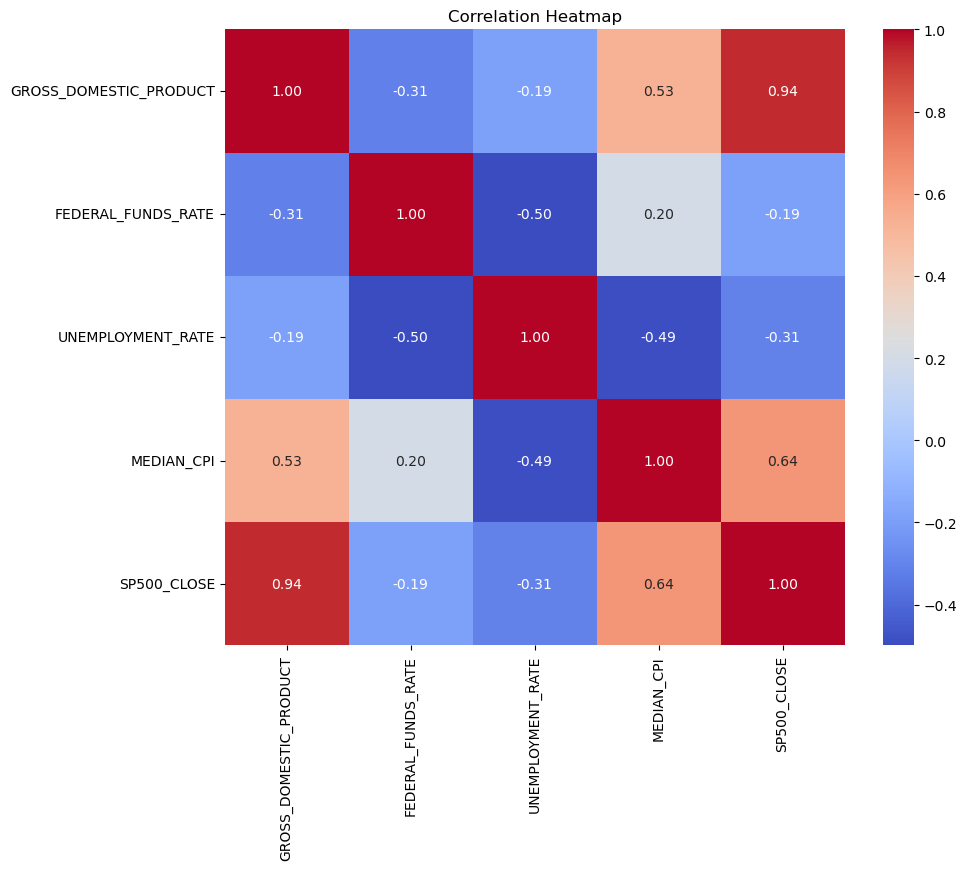

In [34]:
# Convert all columns except 'DATE' to numeric
for col in numeric_data.columns:
    numeric_data[col] = pd.to_numeric(numeric_data[col], errors='coerce')

# Compute the correlation matrix again
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [35]:
print(merged_data.dtypes)


DATE                       object
GROSS_DOMESTIC_PRODUCT    float64
FEDERAL_FUNDS_RATE        float64
UNEMPLOYMENT_RATE         float64
MEDIAN_CPI                float64
SP500_CLOSE               float64
dtype: object


In [36]:
# Query and merge all key indicators
query = """
    SELECT GDP.DATE, GDP.GROSS_DOMESTIC_PRODUCT, FEDERAL_FUNDS_EFFECTIVE_RATE.FEDERAL_FUNDS_RATE,
           UNEMPLOYMENT_RATE.UNEMPLOYMENT_RATE, MEDIAN_CPI.MEDIAN_CPI, SP500.CLOSE AS SP500_CLOSE
    FROM GDP
    JOIN FEDERAL_FUNDS_EFFECTIVE_RATE ON GDP.DATE = FEDERAL_FUNDS_EFFECTIVE_RATE.DATE
    JOIN UNEMPLOYMENT_RATE ON GDP.DATE = UNEMPLOYMENT_RATE.DATE
    JOIN MEDIAN_CPI ON GDP.DATE = MEDIAN_CPI.DATE
    JOIN SP500 ON GDP.DATE = SP500.DATE;
"""
merged_data = pd.read_sql_query(query, conn)

# Compute correlation matrix
correlation_matrix = merged_data.corr()

# Heatmap of correlations
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: '2001-10-01 00:00:00.000000'

## Section 5 (Optional): Building an Analytical Dashboard (Example in Tableau/Power BI)

In [37]:
consolidated_df.to_csv(r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Economic_Trend_Analysis\Resources\consolidated_data.csv", index=False)


## Section 6: Project Summary and Documentation
